# More Pandas

![more_pandas](https://media.giphy.com/media/H0Qi5W2KzU5UI/giphy.gif)

### Scenario
You have decided that you want to start your own animal shelter, but you want to get an idea of what that will entail and to get more information about planning. In this lecture, we'll look at a real data set collected by Austin Animal Center.  The code below will return the last 1000 animal outcomes that have occurred.  We will use our pandas skills from the last lecture and learn some new ones in order to explore these data further.




#### Our goals in this notebook are to be able to: <br/>

- Apply and use `.map()`, `apply()`, and `.applymap()` from the Pandas library
- Introduce lambda functions and use them in coordination with above functions
- Explain what a groupby object is and split a DataFrame using `.groupby()`


#### Getting started

Let's take a moment to download and to examine the [Austin Animal Center data set](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238/data). 

Let's take a look at the data:

In [67]:
import numpy as np
import pandas as pd
import requests

%load_ext autoreload
%autoreload 2

from src.student_caller import one_random_student, three_random_students
from src.student_list import student_list

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
url = 'https://data.austintexas.gov/resource/9t4d-g238.json'
response = requests.get(url)
animals = pd.DataFrame(response.json())
animals.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,A821711,Mama Cat,2020-08-30T16:45:00.000,2020-08-30T16:45:00.000,2018-08-18T00:00:00.000,Euthanasia,Suffering,Cat,Spayed Female,2 years,Domestic Shorthair,Brown Tabby
1,A821182,Samantha,2020-08-30T16:15:00.000,2020-08-30T16:15:00.000,2011-08-05T00:00:00.000,Adoption,NaN,Cat,Spayed Female,9 years,Domestic Shorthair Mix,Black/White
2,A822295,Lucas,2020-08-30T15:44:00.000,2020-08-30T15:44:00.000,2010-08-30T00:00:00.000,Return to Owner,NaN,Dog,Neutered Male,10 years,Pomeranian,Buff
3,A822296,NaN,2020-08-30T15:01:00.000,2020-08-30T15:01:00.000,2018-08-30T00:00:00.000,Euthanasia,Suffering,Other,Unknown,NULL,Squirrel,Brown
4,A822292,NaN,2020-08-30T14:57:00.000,2020-08-30T14:57:00.000,2018-08-30T00:00:00.000,Euthanasia,Suffering,Dog,Intact Male,NULL,Boxer,Black Brindle/Brown Brindle


In [77]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   animal_id         1000 non-null   object
 1   name              613 non-null    object
 2   datetime          1000 non-null   object
 3   monthyear         1000 non-null   object
 4   date_of_birth     1000 non-null   object
 5   outcome_type      999 non-null    object
 6   outcome_subtype   635 non-null    object
 7   animal_type       1000 non-null   object
 8   sex_upon_outcome  1000 non-null   object
 9   age_upon_outcome  1000 non-null   object
 10  breed             1000 non-null   object
 11  color             1000 non-null   object
dtypes: object(12)
memory usage: 93.9+ KB


One way to become familiar with your data is to start asking questions. In your EDA notebooks, **markdown** will be especially helpful in tracking these questions and your methods of answering the questions.  

For example, a simple first question we might ask, after being presented with the above dataset, would be:

## What is the most commonly adopted animal type in the dataset?

We can then begin thinking about what parts of the DataFrame we need to answer the question.

    What features do we need?
     - 
    What type of logic and calculation do we perform?
     -  
    What type of visualization would help us answer the question?
     -

In [69]:
# Your code here

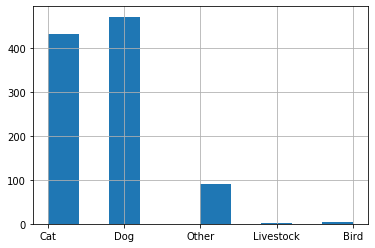

In [52]:
#__SOLUTION__
# We need the animal_type feature, and the outcome_type feature
most_common_adoption = animals[['animal_type', 'outcome_type']]

most_common_adoption[most_common_adoption.outcome_type=='Adoption']
most_common_adoption['animal_type'].hist()

Questions lead to other questions. For the above example, the visualization begs the question, what Other animals are being adopted?

To find out, we need to know where the type of animal for Other is encoded.   
    
    What features do we need to answer what the most commonly adopted type of animal within the Other category is?
        - 

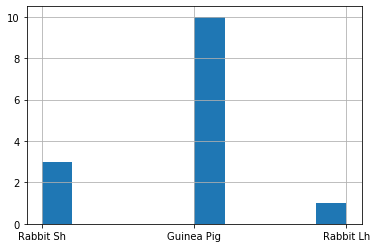

In [53]:
#__SOLUTION__
other_animals = animals[(animals.animal_type == 'Other') & (animals.outcome_type=='Adoption')]
other_animals['breed'].hist()

![hive mind](https://media.giphy.com/media/l0MYttFGk98Y4e4h2/giphy.gif)


What kinds of questions can we ask these data and what kinds of information can we get back?
Start filling in the [group question doc](https://docs.google.com/document/d/1Oq9cHGbKxKzvO9Ep_JAxrRWrLFlTEn0VpJVqEGXNdUQ/edit) together.  You can either add an individual question, or contribute to filling out another students question.  

# Quick Exploration

In [54]:
# Use info to check for na's, datatypes, and shape

In [55]:
#__SOLUTION__
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   animal_id         1000 non-null   object
 1   name              613 non-null    object
 2   datetime          1000 non-null   object
 3   monthyear         1000 non-null   object
 4   date_of_birth     1000 non-null   object
 5   outcome_type      999 non-null    object
 6   outcome_subtype   635 non-null    object
 7   animal_type       1000 non-null   object
 8   sex_upon_outcome  1000 non-null   object
 9   age_upon_outcome  1000 non-null   object
 10  breed             1000 non-null   object
 11  color             1000 non-null   object
dtypes: object(12)
memory usage: 93.9+ KB


In [56]:
# Use describe to gain a bit more detail about certain features. 


In [57]:
#__SOLUTION__ 
animals.describe()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
count,1000,613,1000,1000,1000,999,635,1000,1000,1000,1000,1000
unique,993,557,863,863,507,7,12,5,5,43,188,114
top,A821481,Luna,2020-08-04T11:18:00.000,2020-08-04T11:18:00.000,2020-06-10T00:00:00.000,Adoption,Foster,Dog,Neutered Male,2 years,Domestic Shorthair,Brown Tabby
freq,2,5,5,5,14,503,253,472,336,199,273,91


Use value counts to check a categorical feature's distribution

In [58]:
#__SOLUTION__
animals.animal_type.value_counts()

Dog          472
Cat          433
Other         90
Bird           4
Livestock      1
Name: animal_type, dtype: int64

Use isna() for a more legible output (than .info()) of na distributions of our dataset.

In [59]:
#__SOLUTION__
animals.isna().sum()

animal_id             0
name                387
datetime              0
monthyear             0
date_of_birth         0
outcome_type          1
outcome_subtype     365
animal_type           0
sex_upon_outcome      0
age_upon_outcome      0
breed                 0
color                 0
dtype: int64

Use fillna to fill animals with no name to unnamed

In [60]:
# We can use fillna 
three_random_students(student_list)

['Karim' 'Matthew' 'Josh']


In [61]:
#__SOLUTION__
animals['name'] = animals['name'].fillna('unnamed')

In [62]:
animals.fillna('no_type_or_subtype', inplace=True)

In [63]:
animals.isna().sum()

animal_id           0
name                0
datetime            0
monthyear           0
date_of_birth       0
outcome_type        0
outcome_subtype     0
animal_type         0
sex_upon_outcome    0
age_upon_outcome    0
breed               0
color               0
dtype: int64

### 1. Applying and using map and applymap from the Pandas library

The built in **map** operator takes a function and applies it to every element of an iterable

In [64]:
def divisible_by_5(number):
    
    '''
    Parameter: an integer
    return numbers divisible by five
    '''
    
    if number % 5 == 0:
        return True
    else:
        return False

numbers = [17,29,30045, 125]

list(map(divisible_by_5, numbers))


[False, False, True, True]

The Pandas library has several similar methods associated with Dataframes and Series. Let's explore them.

# DataFrame.applymap(), Series.map()  Series.apply()

## DataFrame.applymap()
The ```.applymap()``` method takes a function as input that it will then apply to every entry in the dataframe.

In [70]:
animals.applymap(type)

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
1,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
2,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
3,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
4,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
...,...,...,...,...,...,...,...,...,...,...,...,...
995,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
996,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
997,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>
998,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>


# Series.map()

The **.map()** method takes a function as input that it will then apply to every entry in the Series.

Let's map a ternary class set to consolodate sex_upon_outcome to male, female, or unknown   

First, explore the unique values:

In [79]:
animals['sex_upon_outcome'].unique()

array(['Spayed Female', 'Neutered Male', 'Unknown', 'Intact Male',
       'Intact Female'], dtype=object)

In [141]:
# we could also use np.unique() with the return_counts parameter

np.unique(animals['sex_upon_outcome'], return_counts=True)


(array(['Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female',
        'Unknown'], dtype=object),
 array([123, 107, 334, 326, 110]))

In [ ]:
# Your code here

In [80]:
#__SOLUTION__

animals['sex_upon_outcome'].map({'Intact Female':'female', 'Spayed Female':'female',
                                 'Intact Male':'male', 'Neutered Male':'male',
                                  'Unknown':'unknown'})

0       female
1       female
2         male
3      unknown
4         male
        ...   
995     female
996       male
997     female
998    unknown
999       male
Name: sex_upon_outcome, Length: 1000, dtype: object

# Series.apply()

Series.apply() is similar to .map, except it only takes a function as a parameter, whereas .map can take a list, dictionary, or function.  .apply() is meant for more complex functions.

Now let's define a custom function that converts all ages upon outcome to days, and create a new column with .apply():

In [81]:
# First, checkout what happens when we split on a space

list(animals['age_upon_outcome'].str.split(' '))

[['2', 'years'],
 ['9', 'years'],
 ['10', 'years'],
 ['NULL'],
 ['NULL'],
 ['5', 'years'],
 ['1', 'year'],
 ['1', 'year'],
 ['2', 'years'],
 ['15', 'years'],
 ['1', 'year'],
 ['2', 'years'],
 ['8', 'months'],
 ['2', 'years'],
 ['10', 'years'],
 ['2', 'months'],
 ['2', 'months'],
 ['1', 'month'],
 ['4', 'years'],
 ['2', 'years'],
 ['1', 'year'],
 ['3', 'years'],
 ['2', 'years'],
 ['1', 'year'],
 ['2', 'years'],
 ['2', 'months'],
 ['3', 'months'],
 ['2', 'years'],
 ['3', 'years'],
 ['1', 'year'],
 ['2', 'years'],
 ['2', 'months'],
 ['2', 'months'],
 ['NULL'],
 ['2', 'months'],
 ['5', 'months'],
 ['4', 'months'],
 ['1', 'year'],
 ['2', 'months'],
 ['3', 'years'],
 ['3', 'years'],
 ['1', 'year'],
 ['4', 'months'],
 ['4', 'months'],
 ['4', 'months'],
 ['2', 'years'],
 ['3', 'years'],
 ['6', 'years'],
 ['6', 'years'],
 ['1', 'day'],
 ['1', 'day'],
 ['1', 'day'],
 ['1', 'day'],
 ['1', 'day'],
 ['1', 'day'],
 ['1', 'day'],
 ['1', 'day'],
 ['1', 'day'],
 ['1', 'day'],
 ['1', 'day'],
 ['1', 'day

# Pair program #1: 
Take 10 minutes to fill in the function below with code that converts age upon outcome to days upon outcome.

In [85]:
# check what values we have for time frame
unit_values = [age[0] if age[0] == 'NULL' 
               else age[1] for age in 
               animals['age_upon_outcome'].str.split(' ')]
set(unit_values)

{'NULL', 'day', 'days', 'month', 'months', 'week', 'weeks', 'year', 'years'}

Now, fill in the definition below to convert the ages to days

In [93]:

def age_to_days(age):
    
    '''
    params: age upon outcome of shelter animal. 
    A number followed by a unit of time 
    'NULL', 'days', 'month', 'months', 'week', 'weeks', 'year', 'years'
    
    returns: days old at outcome
    '''
    
    age_split = age.split(' ')
    
    if len(age_split) == 1:
        return np.nan
    
    elif ... :
        return
    
    elif ... :
         pass
    
    elif ... :
         pass
    
    else:
         pass
    
    
animals['age_upon_outcome'].apply(age_to_days)


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: age_upon_outcome, Length: 1000, dtype: float64

In [94]:
#__SOLUTION__
def age_to_days(age):
    
    '''
    params: age upon outcome of shelter animal. 
    A number followed by a unit of time 
    'NULL', 'days', 'month', 'months', 'week', 'weeks', 'year', 'years'
    
    returns: days old at outcome
    '''
    
    age_split = age.split(' ')
    
    if len(age_split) == 1:
        return np.nan
    
    elif age_split[1] == 'days' :
        return int(age_split[0])
    
    elif age_split[1] in (['month' or 'months']):
        return int(age_split[0]) * 30
    
    elif age_split[1] in ['week' or 'weeks'] :
        return int(age_split[0]) * 7
    
    else:
        return int(age_split[0]) * 365
    
    
animals['days_upon_outcome'] = animals['age_upon_outcome'].apply(age_to_days)
animals.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,days_upon_outcome
0,A821711,Mama Cat,2020-08-30T16:45:00.000,2020-08-30T16:45:00.000,2018-08-18T00:00:00.000,Euthanasia,Suffering,Cat,Spayed Female,2 years,Domestic Shorthair,Brown Tabby,730.0
1,A821182,Samantha,2020-08-30T16:15:00.000,2020-08-30T16:15:00.000,2011-08-05T00:00:00.000,Adoption,NaN,Cat,Spayed Female,9 years,Domestic Shorthair Mix,Black/White,3285.0
2,A822295,Lucas,2020-08-30T15:44:00.000,2020-08-30T15:44:00.000,2010-08-30T00:00:00.000,Return to Owner,NaN,Dog,Neutered Male,10 years,Pomeranian,Buff,3650.0
3,A822296,NaN,2020-08-30T15:01:00.000,2020-08-30T15:01:00.000,2018-08-30T00:00:00.000,Euthanasia,Suffering,Other,Unknown,NULL,Squirrel,Brown,NaN
4,A822292,NaN,2020-08-30T14:57:00.000,2020-08-30T14:57:00.000,2018-08-30T00:00:00.000,Euthanasia,Suffering,Dog,Intact Male,NULL,Boxer,Black Brindle/Brown Brindle,NaN


In [107]:
# Let's look at the average age upon outcome of Adopted animals


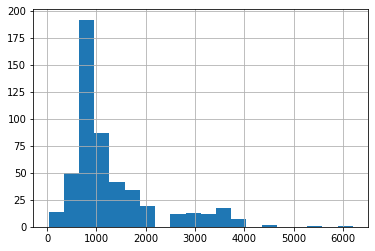

In [106]:
#__SOLUTION__
animals[animals.outcome_type=='Adoption']['days_upon_outcome'].hist(bins=20)

### Anonymous Functions (Lambda Abstraction)

Simple functions can be defined right in the function call. This is called 'lambda abstraction'; the function thus defined has no name and hence is "anonymous".

In [117]:
student_list

['Ali',
 'Andrew',
 'Angie',
 'Elena',
 'Hunter',
 'Jeffrey',
 'Jonathan',
 'Josh',
 'Karim',
 'Matthew',
 'Oz',
 'Paul',
 'Prabhakar',
 'Reuben',
 'Ryan',
 'Sam',
 'Sindhu',
 'Will']

In [133]:
list(map(lambda x: x + ' is '  + 
                    np.random.choice(['hungry', 'sleepy', 'hangry', 
                                      'super pumped about list comprehensions'],
                                     p=[.325,.325,.325,.025]), 
                 student_list))

['Ali is sleepy',
 'Andrew is hangry',
 'Angie is hangry',
 'Elena is hangry',
 'Hunter is hungry',
 'Jeffrey is hungry',
 'Jonathan is hangry',
 'Josh is hungry',
 'Karim is hangry',
 'Matthew is sleepy',
 'Oz is super pumped about list comprehensions',
 'Paul is hangry',
 'Prabhakar is hangry',
 'Reuben is sleepy',
 'Ryan is hangry',
 'Sam is hungry',
 'Sindhu is sleepy',
 'Will is sleepy']

# Student Screen Share (without answer directly below)
Use another lambda function to convert days days upon outcome to weeks upon outcome <br>


In [ ]:
# Your code here

In [110]:
#__SOLUTION__
animals['days_upon_outcome'].apply(lambda x: x//7)

0      104.0
1      469.0
2      521.0
3        NaN
4        NaN
       ...  
995    260.0
996    156.0
997    156.0
998    104.0
999    260.0
Name: days_upon_outcome, Length: 1000, dtype: float64

# Methods for Re-Organizing DataFrames: .groupby()

Those of you familiar with SQL have probably used the GROUP BY command. (And if you haven't, you'll see it very soon!) Pandas has this, too.

The .groupby() method is especially useful for aggregate functions applied to the data grouped in particular ways.

In [150]:
animals.groupby('animal_type').mean()

,days_upon_outcome
animal_type,
Bird,372.500000
Cat,1249.565820
Dog,1364.606383
Livestock,365.000000
Other,857.449438


Notice the object type [DataFrameGroupBy](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) object. 

#### .groups and .get_group()

In [167]:
animals.groupby(['animal_type', 'outcome_type'])

In [168]:
# This retuns each group indexed by the group name: I.E. 'Bird', along with the row indices of each value
animals.groupby('animal_type').groups

{'Bird': Int64Index([310, 314, 389, 693], dtype='int64'),
 'Cat': Int64Index([  0,   1,   7,  12,  15,  16,  19,  29,  31,  34,
             ...
             967, 968, 969, 970, 975, 981, 985, 992, 996, 997],
            dtype='int64', length=433),
 'Dog': Int64Index([  2,   4,   5,   6,   8,   9,  11,  13,  14,  17,
             ...
             982, 983, 984, 986, 987, 988, 993, 994, 995, 999],
            dtype='int64', length=472),
 'Livestock': Int64Index([255], dtype='int64'),
 'Other': Int64Index([  3,  10,  22,  26,  27,  72,  86, 102, 113, 120, 186, 212, 213,
             214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 237, 252, 267,
             271, 275, 282, 283, 322, 323, 328, 329, 330, 332, 380, 393, 394,
             395, 396, 422, 438, 459, 461, 462, 463, 464, 465, 466, 498, 505,
             571, 580, 581, 615, 628, 631, 640, 680, 730, 751, 752, 753, 763,
             764, 770, 771, 783, 807, 811, 812, 816, 818, 825, 827, 881, 882,
             901, 902, 903, 922, 92

Once we know we are working with a type of object, it opens up a suite of attributes and methods. One attribute we can look at is groups.

In [169]:
animals.groupby('animal_type').get_group('Dog')

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,days_upon_outcome
2,A822295,Lucas,2020-08-30T15:44:00.000,2020-08-30T15:44:00.000,2010-08-30T00:00:00.000,Return to Owner,NaN,Dog,Neutered Male,10 years,Pomeranian,Buff,3650.0
4,A822292,NaN,2020-08-30T14:57:00.000,2020-08-30T14:57:00.000,2018-08-30T00:00:00.000,Euthanasia,Suffering,Dog,Intact Male,NULL,Boxer,Black Brindle/Brown Brindle,NaN
5,A822294,Tiger,2020-08-30T14:42:00.000,2020-08-30T14:42:00.000,2015-08-30T00:00:00.000,Adoption,NaN,Dog,Neutered Male,5 years,Dutch Sheepdog,Brown Brindle,1825.0
6,A821777,Archie,2020-08-30T13:06:00.000,2020-08-30T13:06:00.000,2019-08-21T00:00:00.000,Return to Owner,NaN,Dog,Intact Male,1 year,German Shepherd,Black/Brown,365.0
8,A821727,Apollo,2020-08-30T12:05:00.000,2020-08-30T12:05:00.000,2018-08-18T00:00:00.000,Adoption,NaN,Dog,Neutered Male,2 years,Pit Bull,White,730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,A820268,*Myra,2020-07-26T13:37:00.000,2020-07-26T13:37:00.000,2010-07-15T00:00:00.000,Adoption,NaN,Dog,Spayed Female,10 years,German Shepherd,Brown/Black,3650.0
993,A820416,*Petunia,2020-07-25T13:20:00.000,2020-07-25T13:20:00.000,2019-09-19T00:00:00.000,Adoption,NaN,Dog,Spayed Female,10 months,Pit Bull Mix,White/Black,3650.0
994,A632791,Leonard,2020-07-25T12:40:00.000,2020-07-25T12:40:00.000,2010-07-23T00:00:00.000,Adoption,Foster,Dog,Neutered Male,10 years,Labrador Retriever Mix,Black,3650.0
995,A705734,Cj,2020-07-25T11:23:00.000,2020-07-25T11:23:00.000,2015-02-20T00:00:00.000,Adoption,Foster,Dog,Spayed Female,5 years,Labrador Retriever Mix,Brown Brindle,1825.0


We can group by multiple columns, and also return a DataFrameGroupBy object

In [170]:
animals.groupby(['animal_type', 'outcome_type'])

In [173]:
animals.groupby(['animal_type', 'outcome_type']).groups.keys()

dict_keys([('Cat', 'Euthanasia'), ('Cat', 'Adoption'), ('Dog', 'Return to Owner'), ('Other', 'Euthanasia'), ('Dog', 'Euthanasia'), ('Dog', 'Adoption'), ('Dog', 'Transfer'), ('Cat', 'Transfer'), ('Other', 'Adoption'), ('Dog', 'Rto-Adopt'), ('Cat', 'Rto-Adopt'), ('Cat', 'Return to Owner'), ('Cat', 'Died'), ('Other', 'Transfer'), ('Cat', 'Disposal'), ('Other', 'Died'), ('Livestock', 'Adoption'), ('Bird', 'Adoption'), ('Bird', 'Died'), ('Dog', nan), ('Bird', 'Euthanasia'), ('Dog', 'Died'), ('Dog', 'Disposal'), ('Bird', 'Disposal'), ('Other', 'Disposal')])

#### Aggregating

In [176]:
# Just like with single axis groups, we can aggregate on multiple axis
animals.groupby(['animal_type', 'outcome_type']).mean()

animal_id  name  datetime  monthyear  \
animal_type outcome_type                                            
Bird        Adoption                 1     0         1          1   
            Died                     1     0         1          1   
            Disposal                 1     0         1          1   
            Euthanasia               1     0         1          1   
Cat         Adoption               239   169       239        239   
            Died                    11     4        11         11   
            Disposal                 2     1         2          2   
            Euthanasia               9     3         9          9   
            Return to Owner         14    14        14         14   
            Rto-Adopt                8     7         8          8   
            Transfer               150    54       150        150   
Dog         Adoption               248   188       248        248   
            Died                     2     1         2          2   
            Disposal                 1     0         1          1   
            Euthanasia               2     1         2          2   
            Return to Owner         79    72        79         79   
            Rto-Adopt               10    10        10         10   
            Transfer               129    73       129        129   
Livestock   Adoption                 1     0         1          1   
Other       Adoption                14    11        14         14   
            Died                     5     2         5          5   
            Disposal                 2     0         2          2   
            Euthanasia              66     1        66         66   
            Transfer                 3     2         3          3   

                             date_of_birth  outcome_subtype  sex_upon_outcome  \
animal_type outcome_type                                                        
Bird        Adoption                     1                1                 1   
            Died                         1                1                 1   
            Disposal                     1                0                 1   
            Euthanasia                   1                1                 1   
Cat         Adoption                   239              150               239   
            Died                        11               11                11   
            Disposal                     2                0                 2   
            Euthanasia                   9                9                 9   
            Return to Owner             14                1                14   
            Rto-Adopt                    8                0                 8   
            Transfer                   150              150               150   
Dog         Adoption                   248               94               248   
            Died                         2                2                 2   
            Disposal                     1                0                 1   
            Euthanasia                   2                2                 2   
            Return to Owner             79                3                79   
            Rto-Adopt                   10                0                10   
            Transfer                   129              129               129   
Livestock   Adoption                     1                1                 1   
Other       Adoption                    14                7                14   
            Died                         5                5                 5   
            Disposal                     2                0                 2   
            Euthanasia                  66               65                66   
            Transfer                     3                3                 3   

                             age_upon_outcome  breed  color  days_upon_outcome  
animal_type outcome_type                      

In [177]:
# We can then get a specific group, such as Cats that were adopted
animals.groupby(['animal_type', 'outcome_type']).get_group(('Cat', 'Adoption'))

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,days_upon_outcome
1,A821182,Samantha,2020-08-30T16:15:00.000,2020-08-30T16:15:00.000,2011-08-05T00:00:00.000,Adoption,NaN,Cat,Spayed Female,9 years,Domestic Shorthair Mix,Black/White,3285.0
7,A805668,Cali,2020-08-30T13:00:00.000,2020-08-30T13:00:00.000,2019-07-29T00:00:00.000,Adoption,NaN,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Orange Tabby/White,365.0
15,A819959,*Mary Agnes,2020-08-29T15:44:00.000,2020-08-29T15:44:00.000,2020-06-11T00:00:00.000,Adoption,Foster,Cat,Spayed Female,2 months,Domestic Shorthair,Black,730.0
16,A819957,*Orzo,2020-08-29T15:32:00.000,2020-08-29T15:32:00.000,2020-06-11T00:00:00.000,Adoption,Foster,Cat,Neutered Male,2 months,Domestic Shorthair,Brown Tabby,730.0
19,A818022,*Yoshi,2020-08-29T14:47:00.000,2020-08-29T14:47:00.000,2018-05-31T00:00:00.000,Adoption,Foster,Cat,Neutered Male,2 years,Domestic Shorthair,Black/Black,730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,A819023,Yoda,2020-07-27T15:25:00.000,2020-07-27T15:25:00.000,2019-09-19T00:00:00.000,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair,Black/White,3650.0
970,A819022,Davie,2020-07-27T15:24:00.000,2020-07-27T15:24:00.000,2019-08-19T00:00:00.000,Adoption,NaN,Cat,Neutered Male,11 months,Domestic Shorthair,Brown Tabby,4015.0
981,A820568,NaN,2020-07-27T11:09:00.000,2020-07-27T11:09:00.000,2020-04-22T00:00:00.000,Adoption,NaN,Cat,Spayed Female,3 months,Domestic Shorthair,Brown Tabby/White,1095.0
996,A817812,*Zoolander,2020-07-25T11:14:00.000,2020-07-25T11:14:00.000,2020-04-09T00:00:00.000,Adoption,Foster,Cat,Neutered Male,3 months,Domestic Shorthair,Blue/White,1095.0


In [178]:
# Other methods
animals.groupby(['animal_type', 'outcome_type']).first()

animal_id         name                 datetime  \
animal_type outcome_type                                                      
Bird        Adoption          A821112          NaN  2020-08-19T18:24:00.000   
            Died              A821810          NaN  2020-08-19T16:43:00.000   
            Disposal          A820953          NaN  2020-08-05T11:58:00.000   
            Euthanasia        A821655          NaN  2020-08-16T14:55:00.000   
Cat         Adoption          A821182     Samantha  2020-08-30T16:15:00.000   
            Died              A821562        *Itty  2020-08-28T10:07:00.000   
            Disposal          A631349       *Wayne  2020-08-23T09:33:00.000   
            Euthanasia        A821711     Mama Cat  2020-08-30T16:45:00.000   
            Return to Owner   A317744  Sofie Belle  2020-08-28T13:40:00.000   
            Rto-Adopt         A822023       Mitten  2020-08-28T16:29:00.000   
            Transfer          A822163        Kitty  2020-08-29T17:50:00.000   
Dog         Adoption          A822294        Tiger  2020-08-30T14:42:00.000   
            Died              A821604        Negra  2020-08-14T18:22:00.000   
            Disposal          A821299          NaN  2020-08-12T11:59:00.000   
            Euthanasia        A822292       Killer  2020-08-30T14:57:00.000   
            Return to Owner   A822295        Lucas  2020-08-30T15:44:00.000   
            Rto-Adopt         A820772       Trixie  2020-08-28T17:11:00.000   
            Transfer          A793106         Kobe  2020-08-30T00:00:00.000   
Livestock   Adoption          A808934          NaN  2020-08-21T13:25:00.000   
Other       Adoption          A822041      Richard  2020-08-29T12:04:00.000   
            Died              A821928     Cinnamon  2020-08-23T08:30:00.000   
            Disposal          A820946          NaN  2020-08-03T09:53:00.000   
            Euthanasia        A822296          Fox  2020-08-30T15:01:00.000   
            Transfer          A821945  *Quill I Am  2020-08-26T14:55:00.000   

                                           monthyear            date_of_birth  \
animal_type outcome_type                                                        
Bird        Adoption         2020-08-19T18:24:00.000  2020-07-04T00:00:00.000   
            Died             2020-08-19T16:43:00.000  2019-08-19T00:00:00.000   
            Disposal         2020-08-05T11:58:00.000  2018-08-01T00:00:00.000   
            Euthanasia       2020-08-16T14:55:00.000  2019-08-16T00:00:00.000   
Cat         Adoption         2020-08-30T16:15:00.000  2011-08-05T00:00:00.000   
            Died             2020-08-28T10:07:00.000  2020-07-24T00:00:00.000   
            Disposal         2020-08-23T09:33:00.000  2012-05-22T00:00:00.000   
            Euthanasia       2020-08-30T16:45:00.000  2018-08-18T00:00:00.000   
            Return to Owner  2020-08-28T13:40:00.000  2003-03-10T00:00:00.000   
            Rto-Adopt        2020-08-28T16:29:00.000  2020-04-09T00:00:00.000   
            Transfer         2020-08-29T17:50:00.000  2019-12-27T00:00:00.000   
Dog         Adoption         2020-08-30T14:42:00.000  2015-08-30T00:00:00.000   
            Died             2020-08-14T18:22:00.000  2020-02-14T00:00:00.000   
            Disposal         2020-08-12T11:59:00.000  2018-08-07T00:00:00.000   
            Euthanasia       2020-08-30T14:57:00.000  2018-08-30T00:00:00.000   
            Return to Owner  2020-08-30T15:44:00.000  2010-08-30T00:00:00.000   
            Rto-Adopt        2020-08-28T17:11:00.000  2019-07-28T00:00:00.000   
            Transfer         2020-08-30T00:00:00.000  2018-05-19T00:00:00.000   
Livestock   Adoption         2020-08-21T13:25:00.000  2019-08-16T00:00:00.000   
Other       Adoption         2020-08-29T12:04:00.000  2018-08-25T00:00:00.000   
            Died             2020-08-23T08:30:00.000  2018-08-22T00:00:00.000   
            Disposal         2020-08-03T09:53:00.000  2018-08-01T00:00:00.000   
            Euthanasia       

In [179]:
animals.groupby(['animal_type', 'outcome_type']).last()

animal_id         name                 datetime  \
animal_type outcome_type                                                      
Bird        Adoption          A821112          NaN  2020-08-19T18:24:00.000   
            Died              A821810          NaN  2020-08-19T16:43:00.000   
            Disposal          A820953          NaN  2020-08-05T11:58:00.000   
            Euthanasia        A821655          NaN  2020-08-16T14:55:00.000   
Cat         Adoption          A817585   *Zoolander  2020-07-25T10:19:00.000   
            Died              A820625         *Max  2020-07-28T11:33:00.000   
            Disposal          A820841       *Wayne  2020-08-03T11:58:00.000   
            Euthanasia        A820695      Weebles  2020-07-26T14:28:00.000   
            Return to Owner   A820742       Callie  2020-07-29T00:00:00.000   
            Rto-Adopt         A820620        Amber  2020-07-28T12:39:00.000   
            Transfer          A820610        Sandy  2020-07-25T13:34:00.000   
Dog         Adoption          A705734           Cj  2020-07-25T11:23:00.000   
            Died              A820817        Negra  2020-08-04T07:56:00.000   
            Disposal          A821299          NaN  2020-08-12T11:59:00.000   
            Euthanasia        A697658       Killer  2020-08-22T17:23:00.000   
            Return to Owner   A820434         Bear  2020-07-24T18:50:00.000   
            Rto-Adopt         A813191       Twitch  2020-07-30T16:17:00.000   
            Transfer          A820608      Carmine  2020-07-27T11:13:00.000   
Livestock   Adoption          A808934          NaN  2020-08-21T13:25:00.000   
Other       Adoption          A820296       Ginger  2020-07-28T08:24:00.000   
            Died              A820295        Ivory  2020-07-29T09:33:00.000   
            Disposal          A820609          NaN  2020-07-27T11:33:00.000   
            Euthanasia        A820655          Fox  2020-07-25T08:46:00.000   
            Transfer          A820854  Cotton Tail  2020-08-03T12:15:00.000   

                                           monthyear            date_of_birth  \
animal_type outcome_type                                                        
Bird        Adoption         2020-08-19T18:24:00.000  2020-07-04T00:00:00.000   
            Died             2020-08-19T16:43:00.000  2019-08-19T00:00:00.000   
            Disposal         2020-08-05T11:58:00.000  2018-08-01T00:00:00.000   
            Euthanasia       2020-08-16T14:55:00.000  2019-08-16T00:00:00.000   
Cat         Adoption         2020-07-25T10:19:00.000  2020-04-13T00:00:00.000   
            Died             2020-07-28T11:33:00.000  2010-07-24T00:00:00.000   
            Disposal         2020-08-03T11:58:00.000  2020-06-30T00:00:00.000   
            Euthanasia       2020-07-26T14:28:00.000  2019-07-26T00:00:00.000   
            Return to Owner  2020-07-29T00:00:00.000  2018-07-27T00:00:00.000   
            Rto-Adopt        2020-07-28T12:39:00.000  2017-07-24T00:00:00.000   
            Transfer         2020-07-25T13:34:00.000  2019-07-23T00:00:00.000   
Dog         Adoption         2020-07-25T11:23:00.000  2015-02-20T00:00:00.000   
            Died             2020-08-04T07:56:00.000  2011-09-29T00:00:00.000   
            Disposal         2020-08-12T11:59:00.000  2018-08-07T00:00:00.000   
            Euthanasia       2020-08-22T17:23:00.000  2014-06-26T00:00:00.000   
            Return to Owner  2020-07-24T18:50:00.000  2015-07-20T00:00:00.000   
            Rto-Adopt        2020-07-30T16:17:00.000  2015-02-05T00:00:00.000   
            Transfer         2020-07-27T11:13:00.000  2012-07-23T00:00:00.000   
Livestock   Adoption         2020-08-21T13:25:00.000  2019-08-16T00:00:00.000   
Other       Adoption         2020-07-28T08:24:00.000  2019-11-16T00:00:00.000   
            Died             2020-07-29T09:33:00.000  2019-07-16T00:00:00.000   
            Disposal         2020-07-27T11:33:00.000  2018-07-23T00:00:00.000   
            Euthanasia       